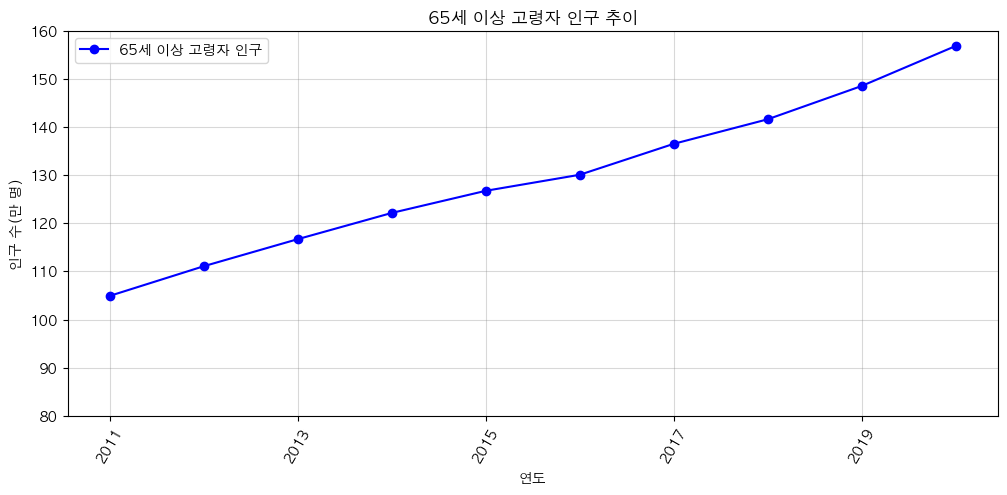

In [27]:
#인구 추이
#점점 늘어가는 노인 인구수를 나타내는 그래프
#따라서 앞으로의 노인을 위한 복지 시스템이 중요해진다는 결론을 이끌어내는 그래프
# + 노인 복지시설의 개수는 늘지않는다는 것과 함께 노인 복지시설을 늘려한다는 주장
import pandas as pd

from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family='AppleGothic')

file_path = './data/인구추이.csv'

df = pd.read_csv(file_path)
df = df.drop(['구분별(1)','구분별(3)'], axis=1)
df = df.iloc[[13]]
df = df.T
df = df[40:50]
df.columns = ['65세 이상 고령자 인구']
df = df/10000
df['65세 이상 고령자 인구']=df['65세 이상 고령자 인구'].astype(float)

df[['65세 이상 고령자 인구']].plot(kind = 'line', marker = 'o', figsize = (12,5), color = ['blue'])
plt.ylim(80, 160)
plt.title('65세 이상 고령자 인구 추이')
plt.xlabel('연도')
plt.ylabel('인구 수(만 명)')
plt.xticks(rotation = 60)
plt.grid(True, color='gray', alpha=0.3)

            10
1             
소득창출 활동   1.60
취미/교양 활동  2.21
종교활동      1.45
자원봉사      1.19
손자녀 양육    0.36


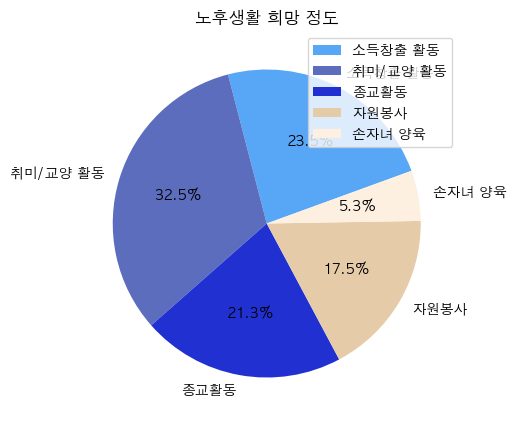

In [28]:
## 노후생활 희망정도
#60대 이상을 대상으로 조사한 노후생활 희망정도를 나타낸 파이 그래프
#노인 인구가 늘어감으로써 복지 시스템에 더 신경써야 한다.
#따라서 밑의 그래프를 이용해 복지시설을 늘릴때 취미/교양 활동에 관련된 복지시설에 신경을 쓰면 예산을 효율적으로 쓸 수 있을 것이다
#각 분야마다의 희망하는 점수 차이를 파이 그래프로 나타냄 
#이떄 그래프로 차이를 눈에 띄게 나타내기 위해 전체적으로 4점을 뺐고 그래프로 나타냈다.
# ex) 취미교양활동 32% 와 손자녀 양육 5%는 (주어진 점수-4)를 비교했을때 6배의 차이가 난다
# ex) 취미교양활도 : 6.21, 손자녀양육 : 4.36, 각 점수에서 4를 빼면 2.21, 0.36 -> 6배의 차이
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family='AppleGothic')

file_path = './data/노후생활_희망정도.csv'
df = pd.read_csv(file_path, header=None)

df = df.iloc[[1,10]]
df = df.T
df = df.iloc[[16,17,18,19,20]]
df.set_index(1, inplace = True)
df[10]=df[10].astype(float)
df = df-4
print(df)
df[10].plot(kind='pie', figsize=(10,5), autopct='%1.1f%%', startangle=20, colors=['#58A6F6', '#5D6DBE', '#2131D1','#E6CBA8','#FDF0E0'])
plt.title('노후생활 희망 정도')
plt.legend(labels=df.index, loc = 'upper right')
plt.ylabel('')
plt.show()

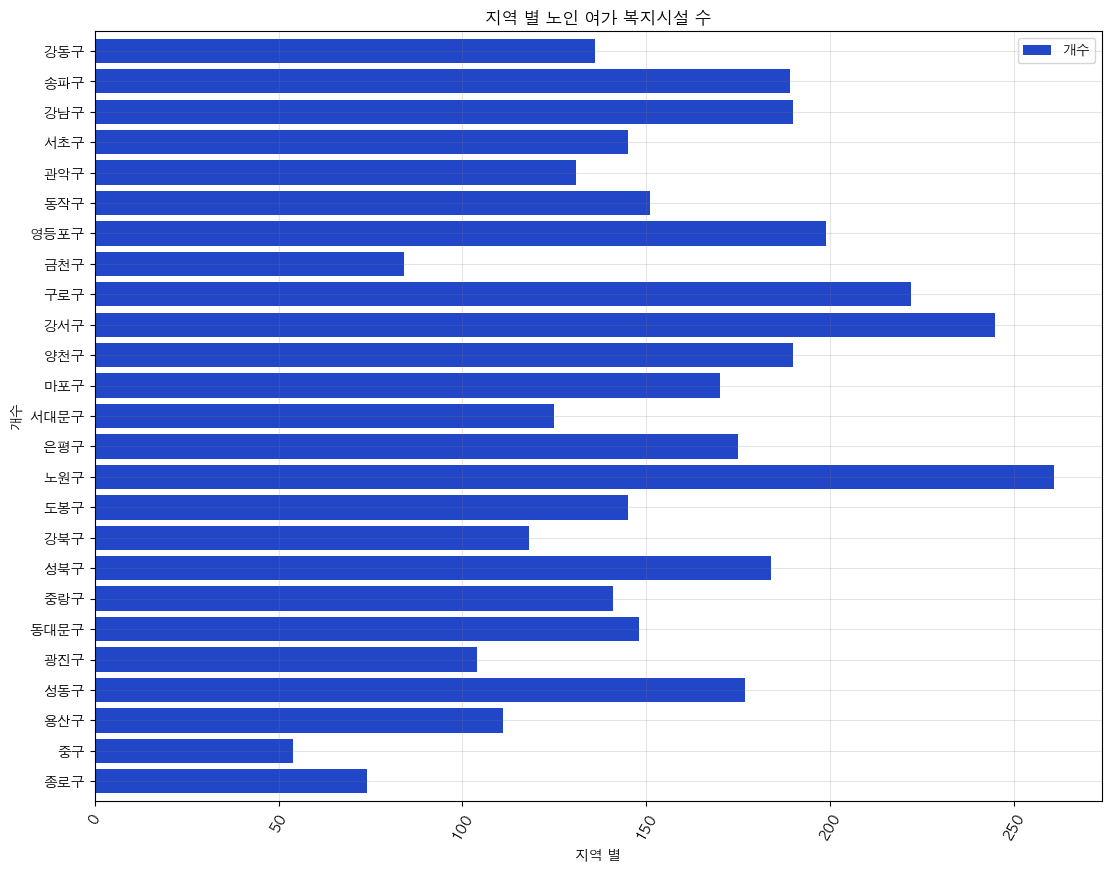

In [29]:
#지역 별 노인 여가 복지시설 수
#지역 별 어르신들의 수와 지역별 노인 여가 복지시설수를 비교해 상대적으로 부족한 지역에 복지시설을 만든다.
#위의 주장을 펼치기 위한 그래프
#이거랑 지역 별 어르신들의 수를 나타낸 그래프 같이 나타내면 좋을듯?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family='AppleGothic')

file_path = './data/노인여가_복지시설.csv'

df = pd.read_csv(file_path, header=None)
df = df.drop_duplicates([1])
df = df.rename(columns=df.iloc[0])
df = df.drop([0,2], axis=0)

df.set_index('동별(2)', inplace = True)
df = df[['2021']]
df.rename(columns={'2021': '개수'}, inplace = True)

df['개수']=df['개수'].astype(float)

df[['개수']].plot(kind = 'barh', figsize = (13,10), width = 0.8, color = ['#2146C7'])
plt.title('지역 별 노인 여가 복지시설 수')
plt.xlabel('지역 별')
plt.ylabel('개수')
plt.xticks(rotation = 60)
plt.grid(True, color='gray', alpha = 0.2)
plt.show()

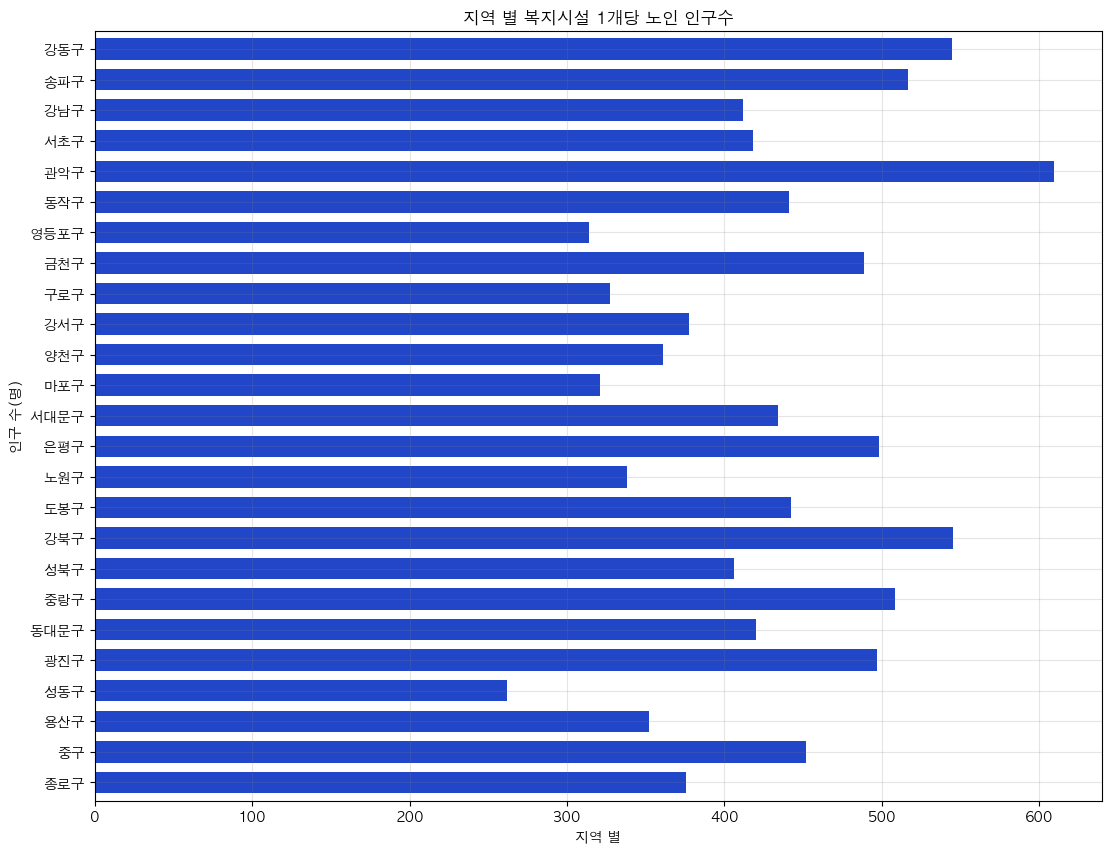

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#1. 폰트설정
font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family='AppleGothic')

#2. 지역별 노인 수 데이터 읽어들이기
df = pd.read_csv('./data/location.csv')
df = df.rename(columns=df.iloc[0])
df = df.drop([0], axis=0)
df.set_index('동별(2)', inplace=True)
df = df.iloc[:,4]
df = df.drop(index=['동별(2)', '소계'])
df=df.astype(float)

#3. 지역별 노인 복지시설 수 데이터 읽어들이기
df1 = pd.read_csv('./data/노인여가_복지시설.csv', header=None)
df1 = df1.drop_duplicates([1])
df1 = df1.rename(columns=df1.iloc[0])
df1 = df1.drop([0,2], axis=0)
df1.set_index('동별(2)', inplace = True)
df1 = df1[['2021']]
df1.rename(columns={'2021': '개수'}, inplace = True)
df1['개수']=df1['개수'].astype(float)

#4. 두개의 데이터 조인(인구 / 복지시설 수)
result = df1.join(df, how='outer')
result1 = result['65세이상 인구']/result['개수']
result1.plot(kind = 'barh', figsize = (13,10), width = 0.7, color = ['#2146C7'])

#5. 그래프 속성 설정
plt.title('지역 별 복지시설 1개당 노인 인구수')
plt.xlabel('지역 별')
plt.ylabel('인구 수(명)')
plt.grid(True, color='gray', alpha = 0.2)
plt.show()

In [ ]:
# 1은 이 주제를 결정한 이유
# 2는 여가 복지시설을 늘려야하는 이유
# 3은 이 시스템이 수요를 어떻게 예측할 수 있는지에 대한 데이터 

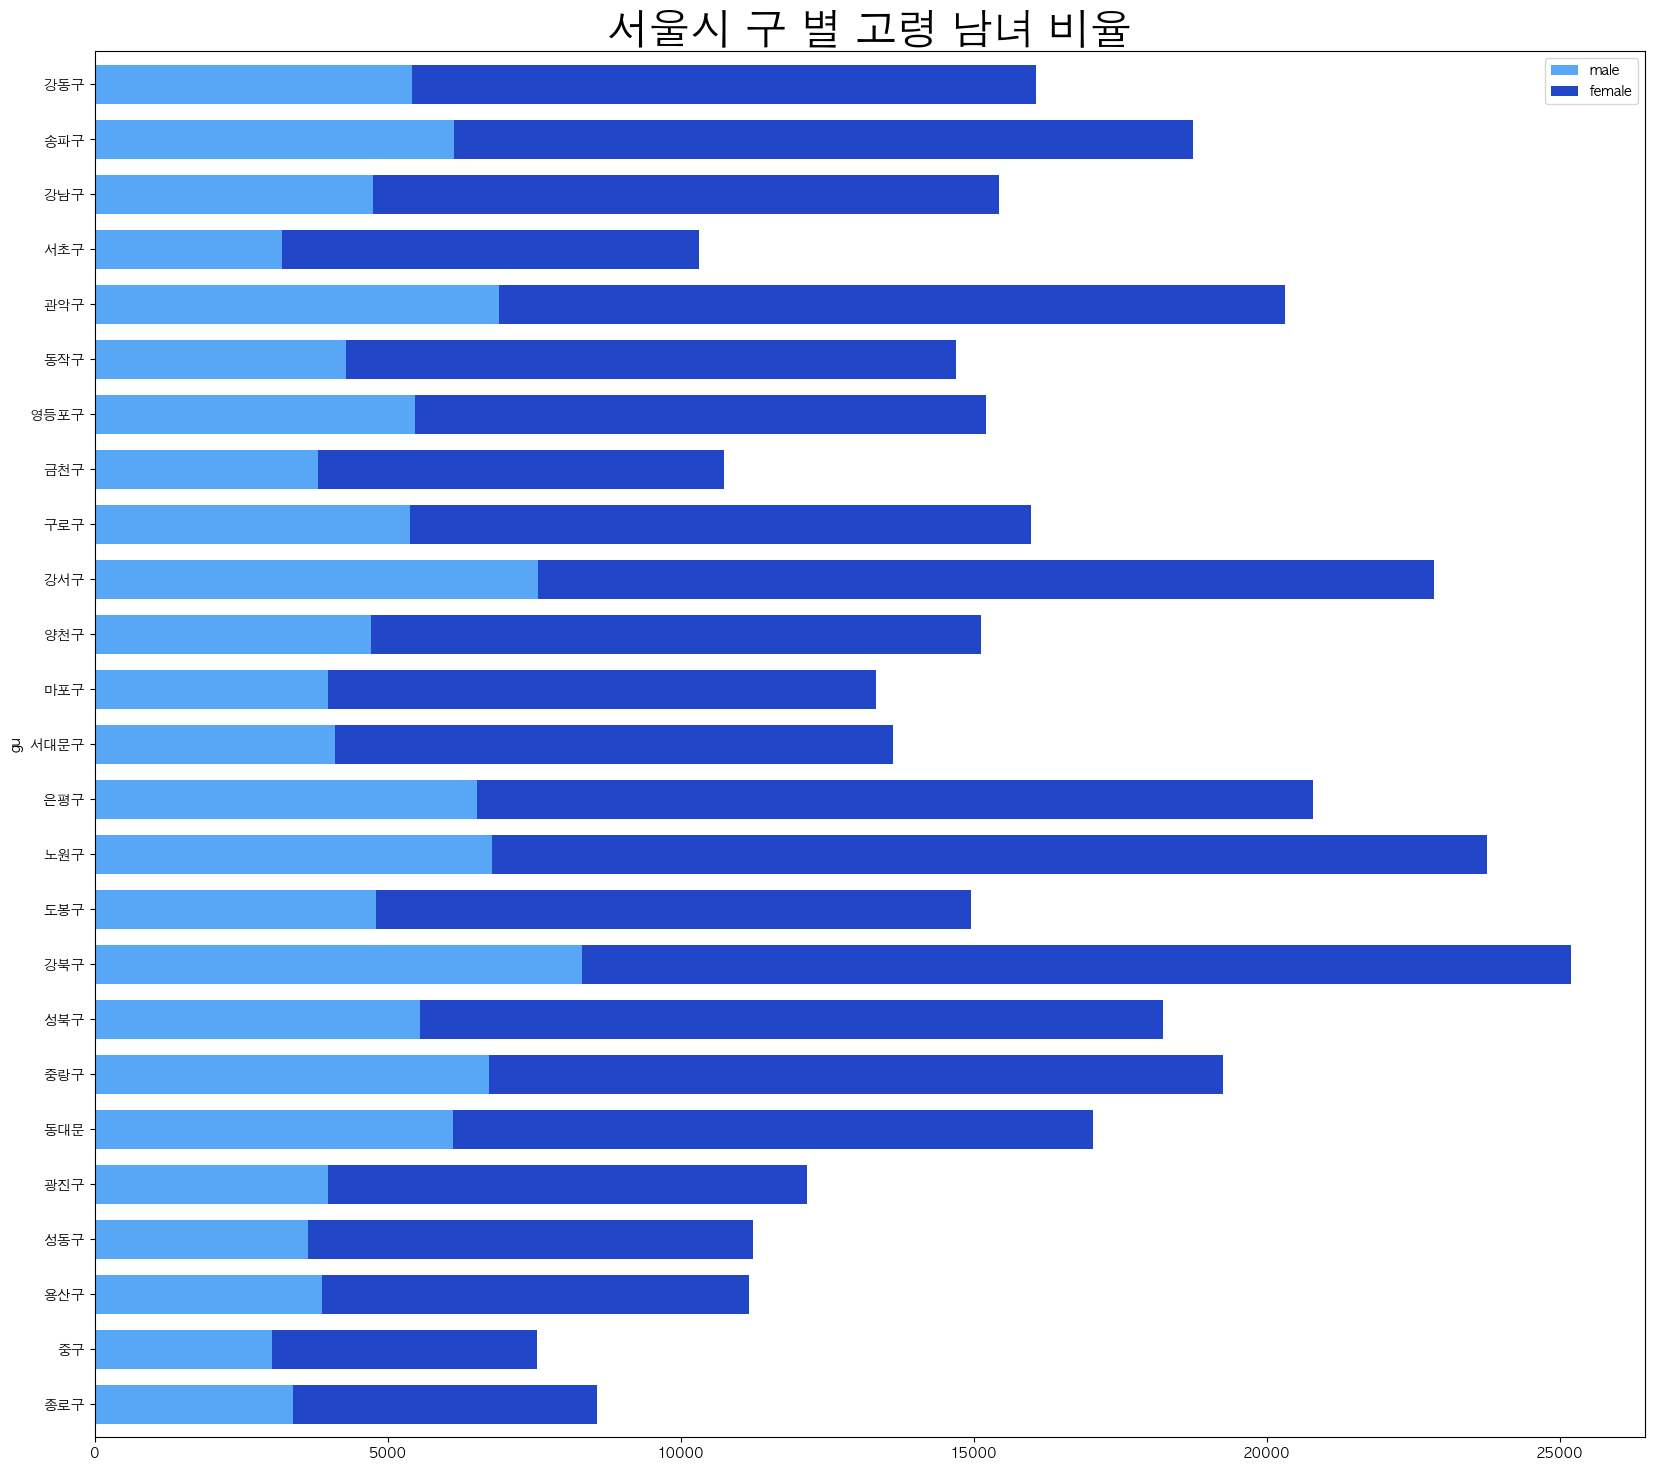

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family='AppleGothic')

#데이터 프레임 설정
df = pd.read_csv('./data/gender.csv', header = None)
df = df.rename(columns=df.iloc[0])
df = df.drop([0], axis=0)
df.set_index('gu', inplace=True)

df['male']=df['male'].astype(float)
df['female']=df['female'].astype(float)

#그래프 그리기
df[['male', 'female']].plot(kind = 'barh', figsize = (20,18), width = 0.7, color = ['#58A6F6', '#2146C7'], stacked=True)

#속성 설정
plt.title('서울시 구 별 고령 남녀 비율', size = 30)

plt.show()